In [108]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


https://medium.com/@muehler.v/simple-hand-gesture-recognition-using-opencv-and-javascript-eb3d6ced28a0

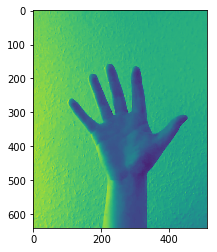

In [109]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
hand = cv2.imread("/content/gdrive/My Drive/app/Hand_Gesture/Project1/five1.png",0)

plt.imshow(hand)

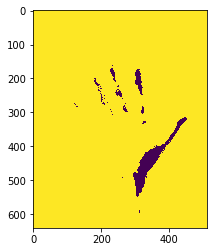

In [110]:
ret, the = cv2.threshold(hand, 70, 255, cv2.THRESH_BINARY)

_,contours,_ = cv2.findContours(the.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

hull = [cv2.convexHull(c) for c in contours]
final = cv2.drawContours(hand.copy(), contours, -1, (255,0,0))
final1 = cv2.drawContours(hand.copy(), hull, -1, (255,0,0))


#cv2.imshow('Originals', hand)
#cv2.imshow('Thresh',the)
#cv2.imshow('Convex hull',final)

#cv2.waitKey(0)
#cv2.destroyAllWindows()


#plt.imshow(hand)
plt.imshow(the)
#plt.imshow(final)

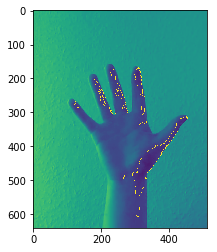

In [111]:
plt.imshow(final)

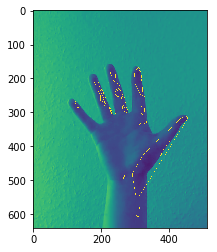

In [112]:
plt.imshow(final1)

In [0]:
print(ret)
print(contours)

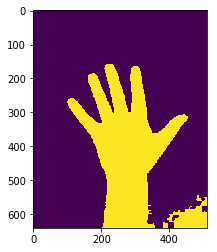

In [115]:
import numpy as np
import cv2
import math
hand = cv2.imread("/content/gdrive/My Drive/app/Hand_Gesture/Project1/five1.png")
#hand = hand.resize(300,300)
plt.imshow(hand)
# Apply Gaussian blur
blur = cv2.GaussianBlur(hand, (3, 3), 0)

# Change color-space from BGR -> HSV
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

# # Create a binary image with where white will be skin colors and rest is black
mask2 = cv2.inRange(hsv, np.array([2, 0, 0]), np.array([20, 255, 255]))

# # Kernel for morphological transformation
kernel = np.ones((5, 5))

# # Apply morphological transformations to filter out the background noise
dilation = cv2.dilate(mask2, kernel, iterations=1)
erosion = cv2.erode(dilation, kernel, iterations=1)

# # Apply Gaussian Blur and Threshold
filtered = cv2.GaussianBlur(erosion, (3, 3), 0)
ret, thresh = cv2.threshold(filtered, 127, 255, 0)

plt.imshow(thresh)


4


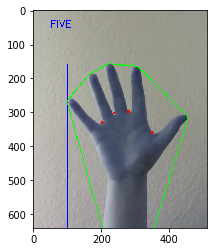

In [116]:
# Find contours
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

try:
    # Find contour with maximum area
    contour = max(contours, key=lambda x: cv2.contourArea(x))
    #print(contour)
    # Create bounding rectangle around the contour
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(hand, (x, y), (x + w, y + h), (0, 0, 255), 0)

    # Find convex hull
    hull = cv2.convexHull(contour)

    # Draw contour
    drawing = np.zeros(hand.shape, np.uint8)
    cv2.drawContours(drawing, [contour], -1, (0, 255, 0), 0)
    cv2.drawContours(drawing, [hull], -1, (0, 0, 255), 0)

    # Find convexity defects
    hull = cv2.convexHull(contour, returnPoints=False)
    defects = cv2.convexityDefects(contour, hull)

    # Use cosine rule to find angle of the far point from the start and end point i.e. the convex points (the finger
    # tips) for all defects
    count_defects = 0
    for i in range(defects.shape[0]):
            s, e, f, d = defects[i, 0]
            start = tuple(contour[s][0])
            end = tuple(contour[e][0])
            far = tuple(contour[f][0])

            a = math.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
            b = math.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
            c = math.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
            angle = (math.acos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c)) * 180) / 3.14

            # if angle > 90 draw a circle at the far point
            if angle <= 90:
                count_defects += 1
                cv2.circle(hand, far, 1, [255, 0, 0], 5)

            cv2.line(hand, start, end, [0, 255, 0], 2)

    # Print number of fingers
    if count_defects == 0:
        cv2.putText(hand, "ONE", (60, 60), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,255),2)
    elif count_defects == 1:
        cv2.putText(hand, "TWO", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,255), 2)
    elif count_defects == 2:
        cv2.putText(hand, "THREE", (5, 50), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,255), 2)
    elif count_defects == 3:
        cv2.putText(hand, "FOUR", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,255), 2)
    elif count_defects == 4:
        cv2.putText(hand, "FIVE", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,255), 2)
    else:
        pass

except:
    pass

plt.imshow(hand)
print(count_defects)